# Avaliação 2 - Introdução à Ciência de Dados
## Análise do banco de dados "Police Violence & Racial Equity - Part 2 of 3"
### Felipe Lamarca e Guilherme Melo

#### Introdução
As relações raciais nos Estados Unidos foram tema de pesquisa de uma série de estudiosos da área das ciências humanas, em especial na Sociologia, na Antropologia e na História. Se as primeiras pesquisas abordavam a temática ainda sob ótica racista, misógina ou classista, autoras como Angela Davis, bell hooks e Patria Hill Collins passaram a tratar da temática considerando a característica da interseccionalidade. A partir de então, foi evidenciado o fato de que é impossível estudar as relações raciais ignorando preconceitos de classe e gênero, e vice-versa.

Ao mesmo tempo, a eleição de Barack Obama sugeriu que a tensão racial em solo norte-americano poderia ter pedido força - afinal, tratava-se de um presidente negro eleito pelo partido Democrata e defendendo pautas progressistas. Por outro lado, pesquisas como a de Stephens-Davidowitz mostraram que o racismo ainda era parte que compunha fortemente o *status quo* norte-americano. O assassinato de George Floyd por parte de dois policiais em 2020 e as manifestações em defesa de sua memória, sob o slogan de *Vidas negras importam*, mostrou como a tensão racial ainda é um problema que acomete a vida dos negros do país.

Este trabalho faz uma análise do banco de dados **Police Violence & Racial Equity - Part 2 of 3** através da linguagem Python. Partimos do arquivo *arrests_national_adults.csv*, cujo recorte temporal é de 1994 a 2016, para mapear o sistema carcerário dos Estados Unidos. As perguntas de pesquisa que guiam esse trabalho são as seguintes:

- Quais crimes são mais cometidos?
- Qual faixa etária está mais presente nas prisões?
- Quais grupos sociais são mais submetidos a prisões?
- Quais foram as alterações na composição da população carcerária entre 1994 e 2016?

Em primeiro lugar, importamos as bibliotecas que pretendemos utilizar no trabalho:

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, importamos o arquivo csv que será analisado (*arrests_national_adults.csv*) e mostramos as primeiras 10 linhas.

In [6]:
dados = pd.read_csv(os.path.join('archive/crime_data/arrests_national_adults.csv'))
dados.head(10)

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,102,74.0,38.0,28.0,12581,263887632,4263,1373,103,183
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,3996,2343.0,961.0,713.0,12581,263887632,183478,94982,5365,6129
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,12005,6697.0,3166.0,2344.0,12581,263887632,514297,237138,12418,14376
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,1279,621.0,286.0,170.0,12581,263887632,101778,39235,2035,1323
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,4085,2464.0,1098.0,928.0,12581,263887632,161655,73552,2556,9460
5,1014,NaN,2016,ASR_DRG,Drug Abuse Violations,13310,264534532,920190,284712,46831,...,11068,5645.0,1852.0,796.0,12581,263887632,844916,325859,14813,11743
6,1015,NaN,2016,ASR_DRK,Drunkenness,13310,264534532,242255,58979,3986,...,5051,2973.0,1250.0,597.0,12581,263887632,228319,44180,3439,23967
7,1016,NaN,2016,ASR_DUI,Drive Under the Influence,13310,264534532,618382,209729,8223,...,15255,10142.0,5076.0,3596.0,12581,263887632,671271,114230,18819,14739
8,1017,NaN,2016,ASR_EMB,Embezzlement,13310,264534532,6450,6352,328,...,319,174.0,72.0,40.0,12581,263887632,7783,4586,234,103
9,1018,NaN,2016,ASR_FAM,Offenses Against the Family and Children,13310,264534532,50809,20743,568,...,750,364.0,188.0,131.0,12581,263887632,47616,21035,552,1804


O primeiro gráfico que faremos diz respeito à porcentagem de homens e mulheres presos. Criamos as funções **proporcao_homens** e **proporcao_mulheres** que divide o total de homens ou mulheres na cadeia pelo equivalente das respectivas populações nos Estados Unidos. No processo, duas colunas novas são criadas.

In [7]:
def proporcao_homens(group):
    total_male = group.total_male.astype(float)
    population = group.population
    group['porcentagem_homens'] = total_male / (population*0.492)
    return group

def proporcao_mulheres(group):
    total_female = group.total_female.astype(float)
    population = group.population
    group['porcentagem_mulheres'] = total_female / (population*0.508)
    return group

dados = dados.groupby(['year']).apply(proporcao_mulheres)
dados = dados.groupby(['year']).apply(proporcao_homens)
dados.head()

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,porcentagem_mulheres,porcentagem_homens
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,38.0,28.0,12581,263887632,4263,1373,103,183,0.000011,0.000035
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,961.0,713.0,12581,263887632,183478,94982,5365,6129,0.000499,0.001722
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,3166.0,2344.0,12581,263887632,514297,237138,12418,14376,0.001586,0.004381
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,286.0,170.0,12581,263887632,101778,39235,2035,1323,0.000214,0.000893
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,1098.0,928.0,12581,263887632,161655,73552,2556,9460,0.000510,0.001389


Em sequência, criamos uma nova tabela transformando a coluna *year* em índice e agrupando os percentuais de homens e mulheres nas prisões. Aqui é desconsiderada a desagregação por tipo de crime. Depois, fazemos o plot do gráfico.

<AxesSubplot:title={'center':'Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano'}, xlabel='year'>

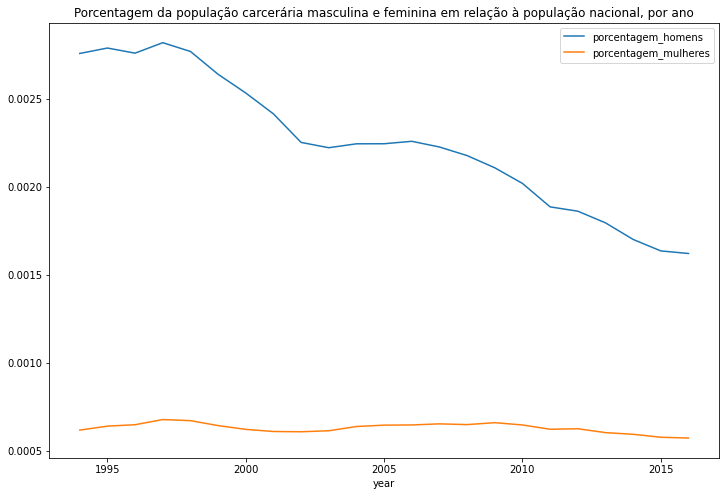

In [10]:
# tabela unindo os dados percentuais de gênero por ano (aqui, todos os percentuais de cada crime são somados)
dados_genero = dados.pivot_table(['porcentagem_homens', 'porcentagem_mulheres'], index = 'year')
dados_genero

# plot do gráfico
dados_genero.plot(title = "Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano", 
                  figsize = (12,8))

#### Adicionar uma análise do gráfico

Agora trataremos da população carcerária a partir da perspectiva racial. Nesse caso, importa notar que os resultados estão em números absolutos. Na prática, isso implica um viés de análise que discutiremos mais a frente. No gráfico abaixo, fazemos uma visualização geral do número de brancos e pretos nas prisões. 

<AxesSubplot:title={'center':'Linha temporal da população carcerária, por raça'}, xlabel='year'>

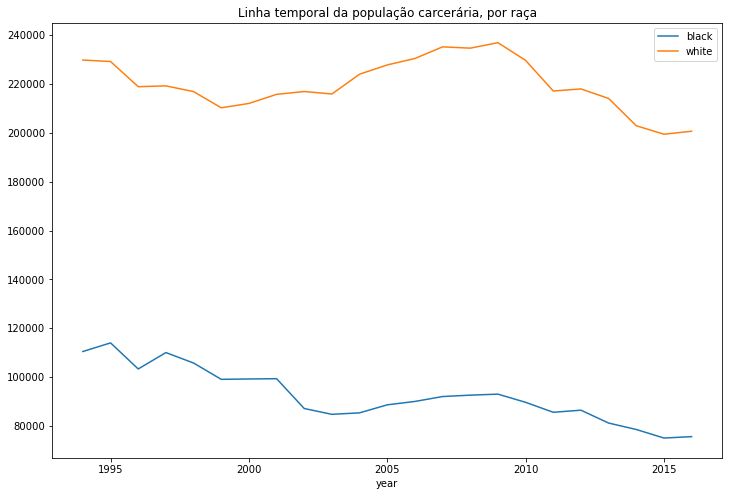

In [25]:
dados_raca = dados.pivot_table(['white', 'black'], index = 'year')
dados_raca.head()

dados_raca.plot(title = "Linha temporal da população carcerária, por raça", figsize = (12,8))

#### Análise bem breve

Para dar continuidade à análise, desagregaremos os dados para alguns crimes específicos. Começamos criando uma lista de crimes que desejamos visualizar graficamente. Em seguida, filtramos a base de dados somente para que tenhamos as colunas importantes nessa análise em específico. Após agruparmos os dados pelo tipo de crime, podemos plotar os gráficos.

Text(0.5, 1.0, 'Vandalism')

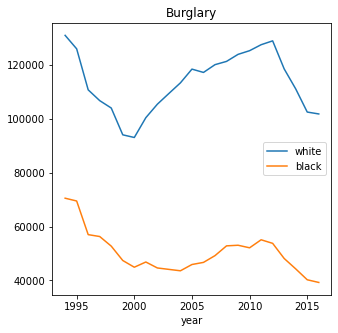

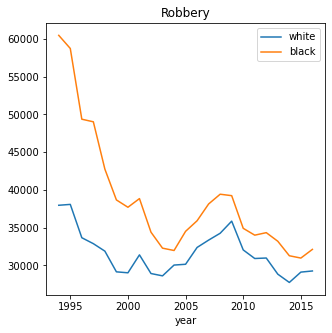

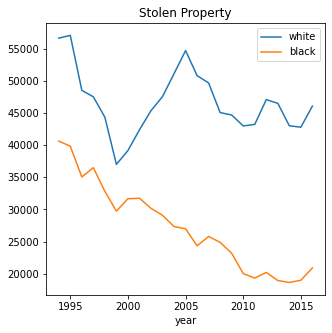

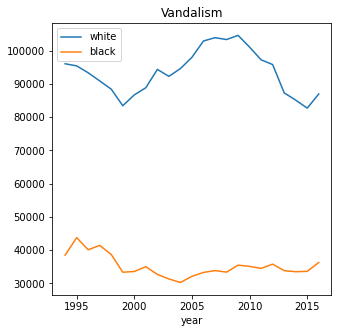

In [11]:
# Gráfico com números absolutos

# crio uma lista dos crimes e um filtro
crimes = ['Burglary', 'Robbery', 'Vandalism', 'Stolen Property']
flt = dados['offense_name'].isin(crimes)

# seleciono as colunas que quero, aplico o filtro e torno 'year' meu novo index
dados_crimes = dados[["year", "offense_name", "white", "black"]]
dados_crimes = dados_crimes[flt]
dados_crimes = dados_crimes.set_index('year')

# agrupo os dados pelos crimes
dados_crimes = dados_crimes.groupby(['offense_name'])

# crio os gráficos e adiciono títulos específicos a cada plot
graficos = dados_crimes.plot(figsize = (5, 5))
graficos[0].set_title('Burglary')
graficos[1].set_title('Robbery')
graficos[2].set_title('Stolen Property')
graficos[3].set_title('Vandalism') 

#### Adicionar uma análise do gráfico

Mas, como dissemos, a análise dos dados a partir de números absolutos é enviesada. Afinal, não se pode desconsiderar que a quantidade de brancos e pretos nos Estados Unidos pode diferir. Aliás, diferem bastante: brancos representam 76% da população, enquanto pretos são somente 13.5%. Em outras palavras, se visualizarmos somente os números absolutos, teremos a falsa impressão de que negros estão sub-representados nas prisões, ao mesmo tempo que há sobre-representação de brancos. 

Se reorientarmos a análise considerando as discrepâncias populacionais de cada raça, é provável que observemos um cenário diferente. O código abaixo faz basicamente o mesmo que o código relativo às funções que criam as colunas para proporção de homens e mulheres nas prisões.

In [14]:
def proporcao_black(group):
    black = group.black.astype(float)
    population = group.population
    group['proporcao_black'] = black / (population*0.135)
    return group

def proporcao_white(group):
    white = group.white.astype(float)
    population = group.population
    group['proporcao_white'] = white / (population*0.76)
    return group

dados_1 = dados.groupby(['year']).apply(proporcao_black)
dados = dados_1.groupby(['year']).apply(proporcao_white)
dados.head()

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,porcentagem_mulheres,porcentagem_homens,proporcao_black,proporcao_white
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,12581,263887632,4263,1373,103,183,0.000011,0.000035,0.000038,0.000021
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,12581,263887632,183478,94982,5365,6129,0.000499,0.001722,0.002660,0.000913
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,12581,263887632,514297,237138,12418,14376,0.001586,0.004381,0.006640,0.002558
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,12581,263887632,101778,39235,2035,1323,0.000214,0.000893,0.001099,0.000506
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,12581,263887632,161655,73552,2556,9460,0.000510,0.001389,0.002060,0.000804


Podemos, agora, plotar nossos gráficos:

Text(0.5, 1.0, 'Vandalism')

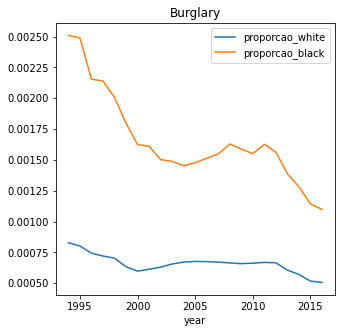

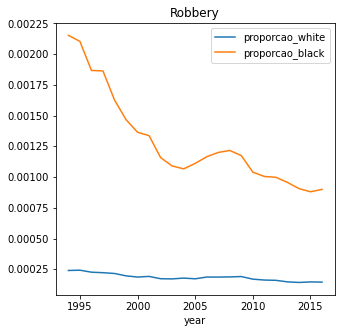

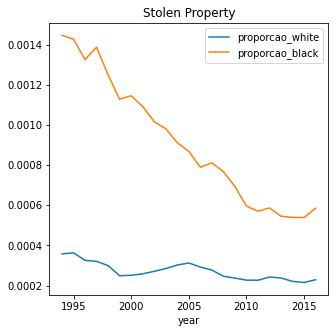

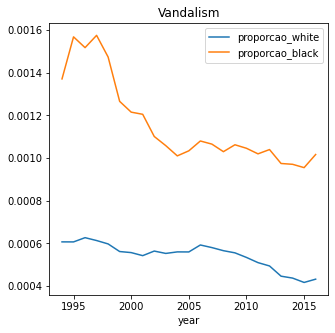

In [15]:
dados_crimes_2 = dados[["year", "offense_name", "proporcao_white", "proporcao_black"]]
dados_crimes_2 = dados_crimes_2[flt]
dados_crimes_2 = dados_crimes_2.set_index('year')

dados_crimes_2

# agrupo os dados pelos crimes
dados_crimes_2 = dados_crimes_2.groupby(['offense_name'])


# crio os gráficos e adiciono títulos específicos a cada plot
graficos = dados_crimes_2.plot(figsize = (5, 5))
graficos[0].set_title('Burglary')
graficos[1].set_title('Robbery')
graficos[2].set_title('Stolen Property')
graficos[3].set_title('Vandalism') 

#### Adicionar uma análise do gráfico

O gráfico a seguir nos fornece um panorama mais geral da quantidade de brancos e negros nas prisões no recorte temporal referido, considerando os crimes em geral.

<AxesSubplot:title={'center':'Porcentagem da população carcerária dividida por raça a cada ano'}, xlabel='year'>

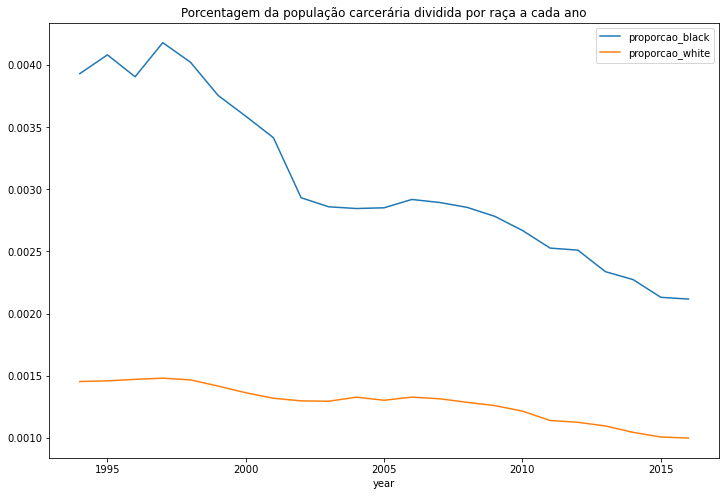

In [24]:
dados_raca_2 = dados.pivot_table(['proporcao_white', 'proporcao_black'], index = 'year')
dados_raca_2

dados_raca_2.plot(title = "Porcentagem da população carcerária dividida por raça a cada ano", figsize = (12,8))

<AxesSubplot:title={'center':'Linha temporal da população carcerária, por raça'}, xlabel='year'>

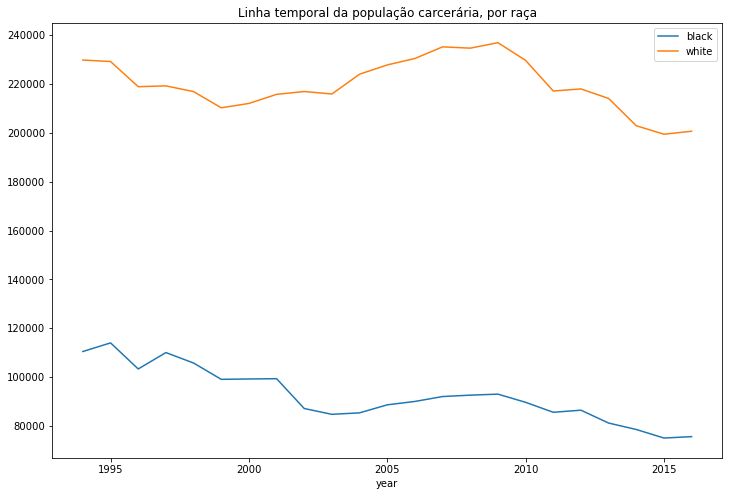

In [23]:
dados_raca = dados.pivot_table(['white', 'black'], index = 'year')
dados_raca.head()

dados_raca.plot(title = "Linha temporal da população carcerária, por raça", figsize = (12,8))